In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 90% de los datos para entrenamiento y un 10% de los datos para validación
valid_idx  =  range ( len ( df ) - 29 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_REESTCOGN', 'ANSIEDADRASGO', 'CSI_RESPROBL', 'SCL90_IDEA_PARAN', 'CSI_EVITPROBL', 'CAPE_POSIT_FREC', 'CSI_AUTOCRIT', 'CSI_RETISOC', 'CSI_APOYOSOC', 'CSI_PENSDESID', 'TRAUMA_FRECUENCIA']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-1.318311 -0.112682 -1.89156  -0.912032 ...  0.226703  0.088698 -1.067742 -0.648816]
 [-0.211102 -0.112682 -0.291787  1.631457 ... -0.623847 -0.251532 -0.228055  0.201927]
 [-0.211102  0.806662 -0.091816 -0.912032 ...  0.43934  -1.272224 -1.403616  0.674562]
 [-1.318311 -1.338475 -1.691588 -0.912032 ... -0.623847 -1.442339 -1.403616 -1.121451]
 [-1.68738   0.193766 -1.291645  2.414069 ...  1.715165 -1.612454  0.443694 -0.743343]]
[0 1 0 0 2]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.081611,1.000702,0.724138,02:53
1,0.945950,0.893823,0.724138,02:47


CSI_REESTCOGN,ANSIEDADRASGO,CSI_RESPROBL,SCL90_IDEA_PARAN,CSI_EVITPROBL,CAPE_POSIT_FREC,CSI_AUTOCRIT,CSI_RETISOC,CSI_APOYOSOC,CSI_PENSDESID,TRAUMA_FRECUENCIA,target,prediction
-0.5802,0.0405,-1.2916,-0.1294,-0.7728,0.3136,-0.3827,0.2267,-1.4423,-0.7319,1.0527,2,0
-1.1338,-0.2659,-2.0915,-0.3251,-1.4318,-0.4674,-1.0878,-1.0491,0.4289,-0.3960,-0.4598,0,0
0.7116,0.1938,1.3080,-0.7164,-0.7728,-0.4674,-0.9116,-0.1986,0.5990,-1.9074,-0.6488,0,0
-0.7647,-0.7256,-0.8917,-0.1294,-0.5531,-0.6236,-1.2641,-0.4112,-0.7619,-0.8998,1.0527,2,0
-0.2111,-0.8788,-1.6916,-0.9120,0.3257,-0.3112,-1.0878,-0.8365,-0.2515,-0.7319,-1.1215,1,0


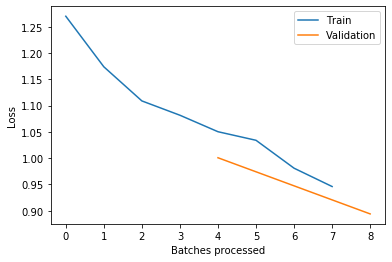

In [10]:
learn.recorder.plot_losses()
learn.show_results()